#                                  >> M1: DATA COLLECTION

In [139]:
# import packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
# filter warnings that can be ignored
import warnings
warnings.filterwarnings('ignore')

In [141]:
#read dataset using read_csv() - data.csv
df = pd.read_csv("city_day.csv")
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


#                        >>M2: PRE-PROCESSING

# Initial level of investigation on dataset

In [142]:
df.shape #dimensions of the data

(29531, 16)

In [143]:
df.columns #print the columns/features of the data

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [144]:
df.describe() #basic info of the dataset

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [145]:
df.count() #number of non null values in each column.

City          29531
Date          29531
PM2.5         24933
PM10          18391
NO            25949
NO2           25946
NOx           25346
NH3           19203
CO            27472
SO2           25677
O3            25509
Benzene       23908
Toluene       21490
Xylene        11422
AQI           24850
AQI_Bucket    24850
dtype: int64

In [146]:
df.info() #returns range, column, number of non-null objects of each column, datatype and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [147]:
#Cities in the dataset

cities = df['City'].value_counts()
print(f'Total number of cities in the dataset : {len(cities)}')
print(cities.index)

Total number of cities in the dataset : 26
Index(['Ahmedabad', 'Delhi', 'Mumbai', 'Bengaluru', 'Lucknow', 'Chennai',
       'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar',
       'Jorapokhar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati',
       'Brajrajnagar', 'Talcher', 'Kolkata', 'Guwahati', 'Coimbatore',
       'Shillong', 'Chandigarh', 'Bhopal', 'Ernakulam', 'Kochi', 'Aizawl'],
      dtype='object')


# Check for the null values present in the dataset

In [148]:
df.isna().sum() #print the sum of null values for each columns

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

Selected dataframe has 16 columns. There are 14 columns that have missing values.

# Calculate total missing values and their percentage

In [149]:
total = df.isnull().sum().sort_values(ascending=False) 
total.head()

Xylene     18109
PM10       11140
NH3        10328
Toluene     8041
Benzene     5623
dtype: int64

Calculate the percent of null values for each columns (sum of null values / total non-null value) *100

In [150]:
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)  #count(returns Non-NAN value)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008


Percent of missing value (bar plot)

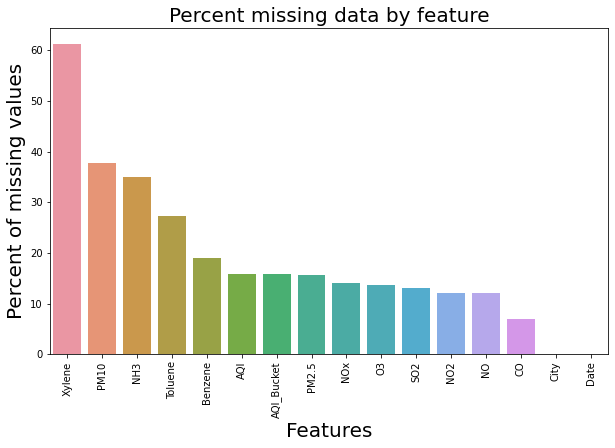

In [151]:
plt.figure(figsize=(10,6))
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=20)
plt.ylabel('Percent of missing values', fontsize=20)
plt.title('Percent missing data by feature', fontsize=20)
plt.xticks(rotation=90)
plt.show()

Handling Missing Values

The column such as PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction. We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [152]:
# defining columns of importance, which shall be used reguarly
COLS = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

In [153]:
from sklearn.impute import SimpleImputer
# invoking SimpleImputer to fill missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df[COLS] = imputer.fit_transform(df[COLS])

In [154]:
#Inputing AQI_Bucket value
df.fillna(method='bfill',inplace=True)
df['AQI_Bucket'] 

0                Poor
1                Poor
2                Poor
3                Poor
4                Poor
             ...     
29526            Good
29527    Satisfactory
29528    Satisfactory
29529    Satisfactory
29530            Good
Name: AQI_Bucket, Length: 29531, dtype: object

In [155]:
# checking to see if the dataset has any missing values left over and the format
print(df.isnull().sum())

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


All the missing values are filled in.

# Outlier Detection and Handling

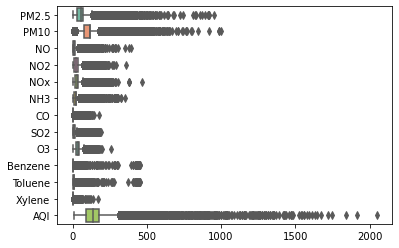

In [156]:
df1 = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]
ax = sns.boxplot(data=df1, orient="h", palette="Set2")

In [157]:
for features in df.columns[2:-3]:
    OF_Q1 = df[features].quantile(0.25) 
    OF_Q2 = df[features].quantile(0.50)
    OF_Q3 = df[features].quantile(0.75) 
    OF_IQR = OF_Q3-OF_Q1
    OF_low_limit = OF_Q1-1.5*OF_IQR
    OF_up_limit = OF_Q3+1.5*OF_IQR
    OF_outlier= df[(df[features] < OF_low_limit ) | (df[features] > OF_up_limit )]
    df[features] = df[features].clip(OF_up_limit,OF_low_limit)
        

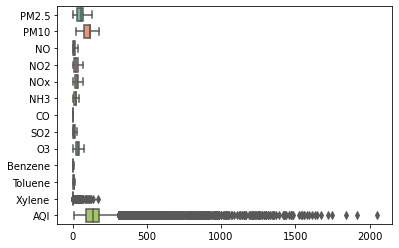

In [158]:
df1 = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]
ax = sns.boxplot(data=df1, orient="h", palette="Set2")

As in figure, AQI and Xylene are still with Outlier Values. So we are performing Outlier Handling for AQI and Xylene.

AQI

Finding Q1,Q2 and Q3

In [159]:
Q_1=df['AQI'].quantile(0.25)
Q_2=df['AQI'].quantile(0.50)
Q_3=df['AQI'].quantile(0.75)

In [160]:
print("Q1=",Q_1)
print("Q2=",Q_2)
print("Q3=",Q_3)

Q1= 88.0
Q2= 138.0
Q3= 179.0


Finding InterQuartile Range

In [161]:
Iqr=Q_3-Q_1
Iqr

91.0

Finding Lower Limit

In [162]:
lowlimit = Q_1-1.5*Iqr
lowlimit

-48.5

Finding Upper Limit


In [163]:
uplimit = Q_3+1.5*Iqr
uplimit

315.5

Finding Outlier Data

In [164]:
AQI_outlier= df[(df['AQI'] < lowlimit ) | (df['AQI'] > uplimit )]
AQI_outlier

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29,Ahmedabad,2015-01-30,79.84,118.127103,13.850000,28.6800,41.0800,23.483476,3.465,27.194943,75.715,0.040000,0.00,4.81,328.0,Very Poor
30,Ahmedabad,2015-01-31,94.52,118.127103,24.390000,32.6600,52.6100,23.483476,3.465,27.194943,75.715,0.240000,0.01,7.67,514.0,Severe
31,Ahmedabad,2015-02-01,132.90,118.127103,34.621824,42.0800,68.0325,23.483476,3.465,27.194943,75.715,0.400000,0.04,25.87,782.0,Severe
32,Ahmedabad,2015-02-02,132.90,118.127103,34.621824,35.3100,68.0325,23.483476,3.465,27.194943,75.715,0.460000,0.06,35.61,914.0,Severe
33,Ahmedabad,2015-02-03,132.90,118.127103,30.610000,28.4000,56.7300,23.483476,3.465,27.194943,73.600,0.170000,0.03,11.87,660.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28929,Visakhapatnam,2018-11-08,132.90,176.345257,25.580000,41.6300,42.9500,10.070000,0.730,19.320000,43.180,5.240000,11.26,4.25,387.0,Very Poor
28985,Visakhapatnam,2019-01-03,132.90,176.345257,25.440000,67.1925,68.0325,16.960000,1.380,27.194943,75.715,5.720000,9.61,4.75,319.0,Very Poor
28991,Visakhapatnam,2019-01-09,132.90,176.345257,29.950000,67.1925,68.0325,15.990000,1.400,21.050000,75.715,5.140000,7.97,3.39,320.0,Very Poor
28996,Visakhapatnam,2019-01-14,132.90,176.345257,20.250000,67.1925,59.2200,16.240000,1.710,27.194943,75.715,5.910000,8.06,3.12,343.0,Very Poor


Removing AQI Outlier

In [165]:
df['AQI'] = df['AQI'].clip(uplimit,lowlimit)

Xylene

Finding Q1,Q2 and Q3 For Xylene

In [166]:
Q1=df['Xylene'].quantile(0.25)
Q2=df['Xylene'].quantile(0.50)
Q3=df['Xylene'].quantile(0.75)
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)

Q1= 2.0
Q2= 3.0701278234985114
Q3= 3.0701278234985114


Finding the Interquartile Range for Xylene

In [167]:
XIQR = Q3-Q1
XIQR

1.0701278234985114

Finding lower Limit for Xylene

In [168]:
lowerlimit = Q1-1.5*XIQR
lowerlimit

0.39480826475223285

Finding Upper Limit for Xylene

In [169]:
upperlimit = Q3+1.5*XIQR
upperlimit

4.675319558746279

Finding Outlier Data For Xylene

In [170]:
Xoutlier= df[(df['Xylene'] < lowerlimit ) | (df['Xylene'] > upperlimit )]
Xoutlier

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.920000,18.22,17.1500,23.483476,0.920000,27.194943,75.715,0.00,0.02,0.00,166.463581,Poor
6,Ahmedabad,2015-01-07,67.450578,118.127103,34.621824,40.62,68.0325,23.483476,3.465000,27.194943,33.470,0.00,0.00,0.00,166.463581,Poor
7,Ahmedabad,2015-01-08,67.450578,118.127103,34.621824,36.74,68.0325,23.483476,3.465000,27.194943,31.890,0.00,0.00,0.00,166.463581,Poor
8,Ahmedabad,2015-01-09,67.450578,118.127103,29.160000,31.00,48.0000,23.483476,3.465000,27.194943,25.750,0.00,0.00,0.00,166.463581,Poor
9,Ahmedabad,2015-01-10,67.450578,118.127103,17.574730,7.04,0.0000,23.483476,2.248598,8.290000,4.550,0.00,0.00,0.00,166.463581,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29427,Visakhapatnam,2020-03-20,23.970000,67.960000,11.370000,35.13,27.9300,11.380000,0.870000,11.120000,37.460,5.28,12.72,5.73,91.000000,Satisfactory
29485,Visakhapatnam,2020-05-17,6.300000,21.096846,1.090000,12.21,7.0700,7.400000,0.110000,8.560000,17.140,0.86,6.90,0.29,23.000000,Good
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.420000,26.06,16.5300,11.990000,0.520000,12.720000,30.140,0.74,2.21,0.38,70.000000,Satisfactory
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.450000,29.53,18.3300,10.710000,0.480000,8.420000,30.960,0.01,0.01,0.00,68.000000,Satisfactory


Removing Xylene Outlier

In [171]:
df['Xylene'] = df['Xylene'].clip(upperlimit,lowerlimit)

Rechecking Outliers

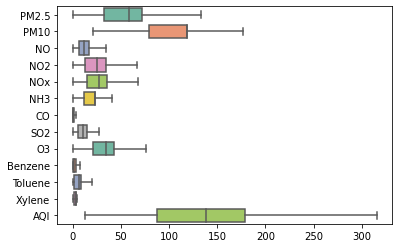

In [172]:
df1 = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]
ax = sns.boxplot(data=df1, orient="h", palette="Set2")

ALL OUTLIERS ARE REMOVED!!

# Encoding

In [173]:
data=df.copy()
df['AQI_Bucket'].value_counts()

Moderate        10295
Satisfactory    10237
Poor             3248
Very Poor        2628
Good             1610
Severe           1513
Name: AQI_Bucket, dtype: int64

In [174]:
encoding = {'Good':6,'Satisfactory':5,'Moderate':4,'Poor':3,'Very Poor':2,'Severe':1}
df['AQI_Bucket'] = df['AQI_Bucket'].replace(encoding)
df['AQI_Bucket']

0        3
1        3
2        3
3        3
4        3
        ..
29526    6
29527    5
29528    5
29529    5
29530    6
Name: AQI_Bucket, Length: 29531, dtype: int64

In [175]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.920,27.194943,75.715,0.00,0.02,0.394808,166.463581,3
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.970,24.550000,34.060,3.68,5.50,3.770000,166.463581,3
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,3.465,27.194943,30.700,6.80,16.40,2.250000,166.463581,3
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.700,18.590000,36.080,4.43,10.14,1.000000,166.463581,3
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,3.465,27.194943,39.310,7.01,18.89,2.780000,166.463581,3


# Feature Reduction

In [176]:
df.corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
PM2.5,1.000000,0.675593,0.445888,0.436076,0.434471,0.338228,0.299084,0.257631,0.208712,0.172375,0.196428,0.050087,0.837849,-0.734617
PM10,0.675593,1.000000,0.418935,0.421199,0.420906,0.358488,0.244187,0.297238,0.223841,0.178905,0.205240,0.047033,0.644082,-0.574577
NO,0.445888,0.418935,1.000000,0.508010,0.739788,0.275933,0.276474,0.338338,-0.031839,0.209174,0.222996,0.048554,0.480921,-0.435963
NO2,0.436076,0.421199,0.508010,1.000000,0.602880,0.361261,0.225996,0.298309,0.308860,0.253733,0.325645,0.054867,0.474620,-0.444236
NOx,0.434471,0.420906,0.739788,0.602880,1.000000,0.246804,0.272556,0.287530,0.057416,0.249209,0.274576,0.059547,0.471735,-0.419030
NH3,0.338228,0.358488,0.275933,0.361261,0.246804,1.000000,0.160798,0.060975,0.149557,0.014599,0.055525,-0.035816,0.327011,-0.293535
CO,0.299084,0.244187,0.276474,0.225996,0.272556,0.160798,1.000000,0.299532,0.040019,0.223971,0.328570,0.166456,0.486975,-0.538321
SO2,0.257631,0.297238,0.338338,0.298309,0.287530,0.060975,0.299532,1.000000,0.202088,0.155857,0.324499,0.064991,0.368316,-0.345646
O3,0.208712,0.223841,-0.031839,0.308860,0.057416,0.149557,0.040019,0.202088,1.000000,0.081834,0.154748,0.042275,0.218589,-0.205269
Benzene,0.172375,0.178905,0.209174,0.253733,0.249209,0.014599,0.223971,0.155857,0.081834,1.000000,0.617177,0.344152,0.200742,-0.233144


<AxesSubplot:>

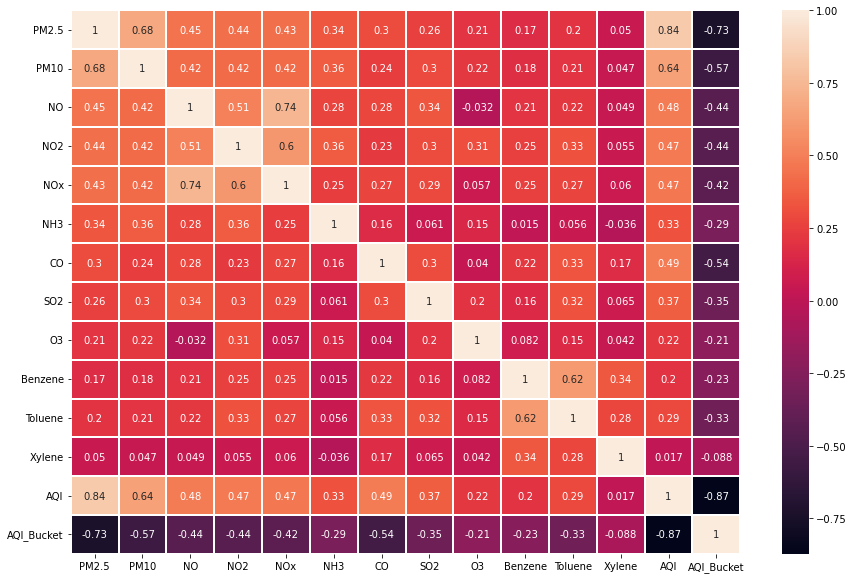

In [177]:
from sklearn import preprocessing
corrmet = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corrmet,annot=True,linewidth=.2)

In [178]:
df['BTX']=df['Benzene']+df['Toluene']+df['Xylene']
x = df.drop(['Benzene', 'Toluene', 'Xylene'],axis=1)

In [179]:
x.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,BTX
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,60.125121,107.566557,14.233758,26.968468,28.951549,20.851662,1.206492,11.890671,33.718880,152.729235,4.014019,11.566688
std,34.874382,41.386046,10.131566,17.351398,18.876389,10.570840,0.941782,7.250163,17.676668,81.991592,1.221328,7.944810
min,0.040000,21.096846,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,13.000000,1.000000,0.394808
25%,32.150000,79.315000,6.210000,12.980000,14.670000,12.040000,0.540000,6.090000,20.740000,88.000000,3.000000,4.704808
50%,58.030000,118.127103,11.530000,25.240000,27.550000,23.483476,0.950000,10.480000,34.491430,138.000000,4.000000,11.771100
75%,72.450000,118.127103,17.574730,34.665000,36.015000,23.483476,1.710000,14.531977,42.730000,179.000000,5.000000,15.051940
max,132.900000,176.345257,34.621824,67.192500,68.032500,40.648690,3.465000,27.194943,75.715000,315.500000,6.000000,32.349851


In [180]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df2=df.copy()
df2.City=le.fit_transform(df2.City)
df2.Date=le.fit_transform(df2.Date)
df2.AQI_Bucket=le.fit_transform(df2.AQI_Bucket)

In [181]:
df2.describe()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,BTX
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,12.888592,1229.236294,60.125121,107.566557,14.233758,26.968468,28.951549,20.851662,1.206492,11.890671,33.718880,2.250422,6.716823,2.599443,152.729235,3.014019,11.566688
std,7.587015,548.624475,34.874382,41.386046,10.131566,17.351398,18.876389,10.570840,0.941782,7.250163,17.676668,2.185328,5.922055,1.207735,81.991592,1.221328,7.944810
min,0.000000,0.000000,0.040000,21.096846,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.394808,13.000000,0.000000,0.394808
25%,6.000000,836.000000,32.150000,79.315000,6.210000,12.980000,14.670000,12.040000,0.540000,6.090000,20.740000,0.240000,1.280000,2.000000,88.000000,2.000000,4.704808
50%,14.000000,1312.000000,58.030000,118.127103,11.530000,25.240000,27.550000,23.483476,0.950000,10.480000,34.491430,1.840000,6.930000,3.070128,138.000000,3.000000,11.771100
75%,20.000000,1706.000000,72.450000,118.127103,17.574730,34.665000,36.015000,23.483476,1.710000,14.531977,42.730000,3.280840,8.700972,3.070128,179.000000,4.000000,15.051940
max,25.000000,2008.000000,132.900000,176.345257,34.621824,67.192500,68.032500,40.648690,3.465000,27.194943,75.715000,7.842101,19.832430,4.675320,315.500000,5.000000,32.349851


# Standardisation

In [195]:
x=df.drop('AQI_Bucket',axis=1)#features
y=df['AQI_Bucket']#Target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [196]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [197]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=4,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [198]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred,average='macro'))
print('Recall is',recall_score(y_test,y_pred,average='macro'))
print('F1 score is',f1_score(y_test,y_pred,average='macro'))

Accuracy is 0.8115794819705434
Precision is 0.7714986921451464
Recall is 0.7495376894696014
F1 score is 0.758510699090265


In [199]:
confusion_matrix(y_test,y_pred)

array([[ 208,   80,    7,    4,    2,    0],
       [  86,  388,   55,    6,    0,    0],
       [   9,   90,  443,   96,    2,    0],
       [   3,   12,  105, 1812,  165,    5],
       [   0,    3,    2,  255, 1749,   30],
       [   0,    1,    1,    6,   88,  194]], dtype=int64)

# Feature engineering

In [182]:
from sklearn.model_selection import train_test_split
x = df2.drop("AQI_Bucket",axis=1)
y = df2["AQI_Bucket"]
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [183]:
#Extract 'year' and 'month_year' from the dataset useful for our analysis
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month_year'] = pd.to_datetime(df['Date']).dt.to_period('M')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,BTX,year,month_year
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.920,27.194943,75.715,0.00,0.02,0.394808,166.463581,3,0.414808,2015,2015-01
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.970,24.550000,34.060,3.68,5.50,3.770000,166.463581,3,12.950000,2015,2015-01
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,3.465,27.194943,30.700,6.80,16.40,2.250000,166.463581,3,25.450000,2015,2015-01
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.700,18.590000,36.080,4.43,10.14,1.000000,166.463581,3,15.570000,2015,2015-01
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,3.465,27.194943,39.310,7.01,18.89,2.780000,166.463581,3,28.680000,2015,2015-01


#                        >>M3: EXPLORATORY DATA ANALYSIS (EDA)

# 1.Univariate

Text(0.5, 1.0, 'AQI')

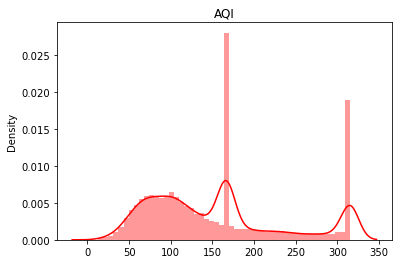

In [184]:
# distplot Air Quality Index per density
sns.distplot(x=df['AQI'],color='red')
plt.title('AQI')

Text(0.5, 1.0, 'Particular Matter 2.5')

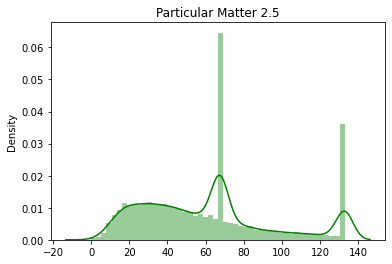

In [185]:
# distplot Particular Matter 2.5 per density
sns.distplot(x=df['PM2.5'],color='green')
plt.title('Particular Matter 2.5')

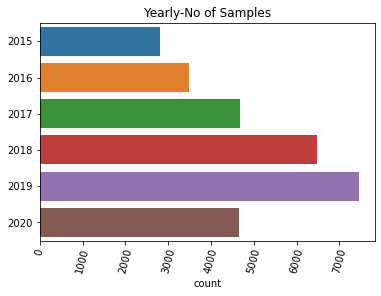

In [186]:
#countplot on Yearly-No of Samples
sns.countplot(y=df.year)
plt.xticks(rotation=75);
plt.title('Yearly-No of Samples')
plt.ylabel(None);

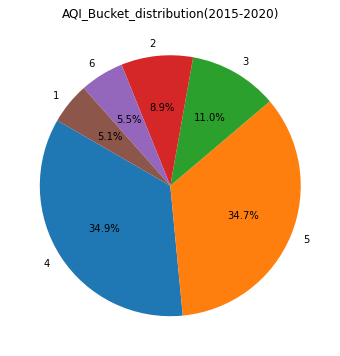

In [187]:
#piechart on AQI_Bucket_distribution(2015-2020
AQI_Bucket_distribution =df.AQI_Bucket.value_counts()
plt.figure(figsize=(10,6))
plt.title('AQI_Bucket_distribution(2015-2020)')
plt.pie(AQI_Bucket_distribution, labels=AQI_Bucket_distribution.index, autopct='%1.1f%%', startangle=150);

# 2. Bi-Variate

Text(0.5, 1.0, 'AQI Bucket v/s AQI')

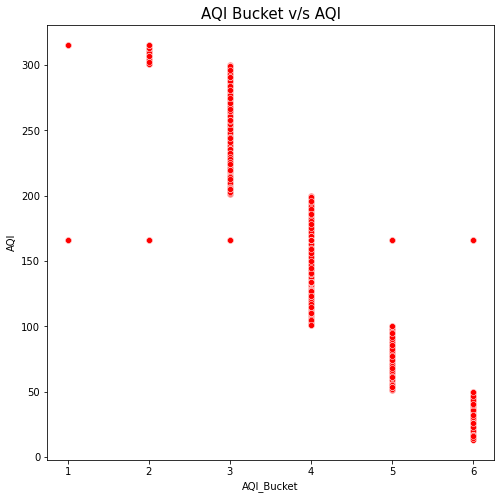

In [188]:
# scatterplot AQI Bucket v/s AQI
plt.figure(figsize=(8,8))
sns.scatterplot(x='AQI_Bucket',y='AQI',data=df,color='red')
plt.title('AQI Bucket v/s AQI',size=15)

Text(0.5, 1.0, 'Co-relation of BTX')

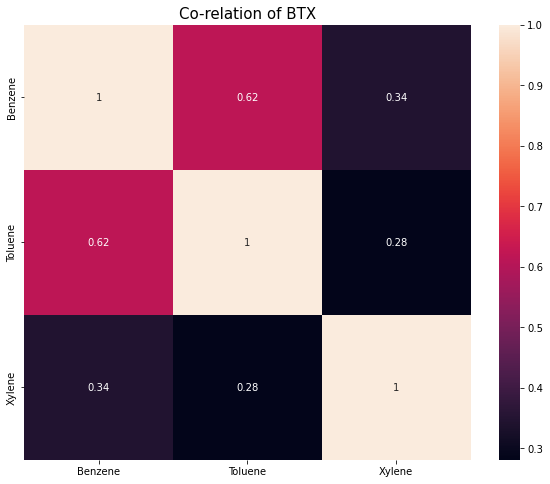

In [189]:
# heatmap on Co-relation of BTX
plt.subplots(figsize=(10,8))
corr1=df[['Benzene','Toluene','Xylene']].corr()
sns.heatmap(corr1,annot=True)
plt.title('Co-relation of BTX',size=15)

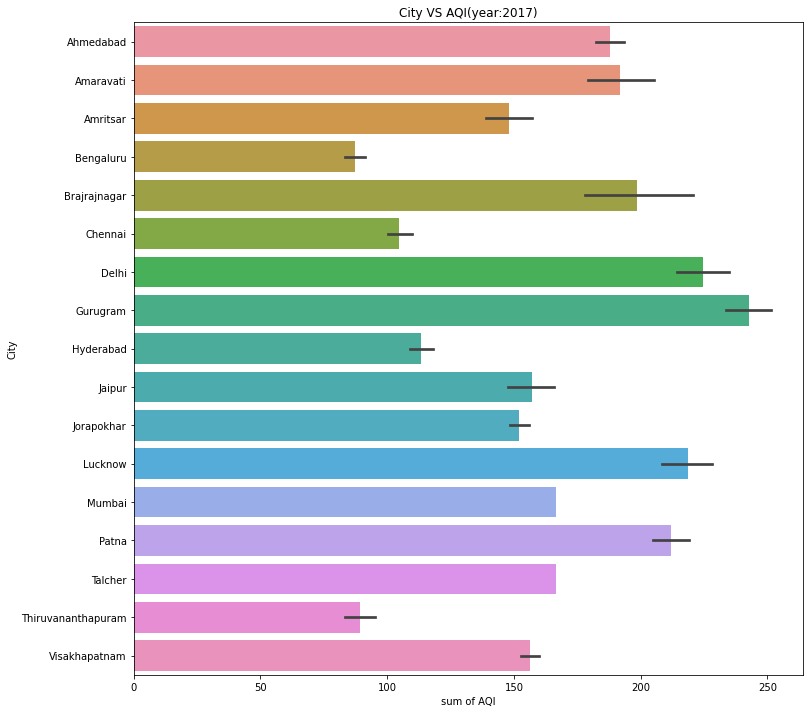

In [190]:
#barplot on City VS AQI(year:2017)
year2017 =df[df.year == 2017]
plt.figure(figsize=(12, 12))
sns.barplot(x = 'AQI',
            y = 'City',
           data = year2017)
plt.title("City VS AQI(year:2017)");
plt.xlabel('sum of AQI');

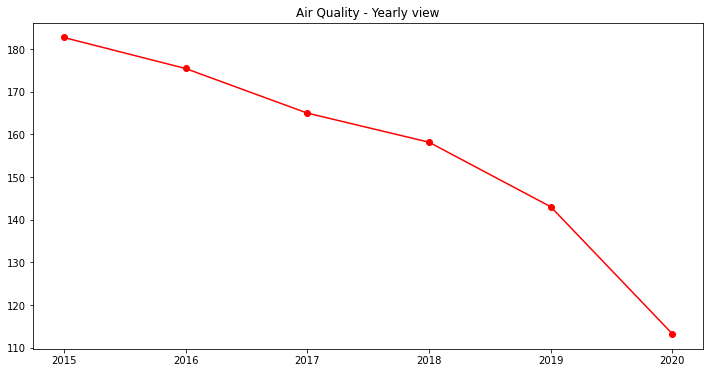

In [191]:
# Air Quality - Yearly view
Yrs = ['year', 'AQI']
yr_df =df[Yrs].copy()
z = yr_df.groupby('year')['AQI'].mean()
Years = list(z.index)
Sum_of_AQI = z.tolist()
plt.figure(figsize=(12,6))
plt.title('Air Quality - Yearly view')
plt.plot(Years, Sum_of_AQI, color='red', marker='o')

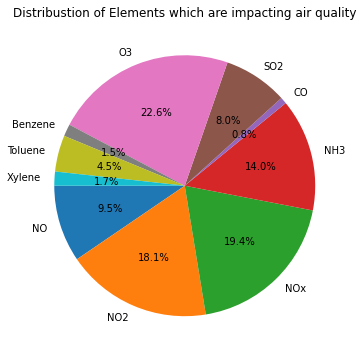

In [192]:
#Distribustion of Elements which are impacting air quality
Elements = ['NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
Elements_whichimpacting_airquality = df[Elements].copy()
element_df = Elements_whichimpacting_airquality.sum()
plt.figure(figsize=(12,6))
plt.title('Distribustion of Elements which are impacting air quality')
plt.pie(element_df, labels=element_df.index, autopct='%1.1f%%', startangle=180);

#                           >> M4: MODELLING

Logistic regression model

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
logit_model=LogisticRegression()
logit_model.fit(X_train,Y_train)
y_pred = logit_model.predict(X_test)

In [194]:
print('Accuracy is',accuracy_score(Y_test,y_pred))
print('Precision is',precision_score(Y_test,y_pred,average='macro'))
print('Recall is',recall_score(Y_test,y_pred,average='macro'))
print('F1 score is',f1_score(Y_test,y_pred,average='macro'))

Accuracy is 0.5811748772642628
Precision is 0.5102546007248973
Recall is 0.4547341746576403
F1 score is 0.4616198947631937


Decision Tree 

In [195]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()
dt_model.fit(X_train, Y_train)
predictions=dt_model.predict(X_test)

In [196]:
print("MSE: ",mean_squared_error(Y_test,predictions))

MSE:  0.06957846622651091


In [197]:
print("R square value: ",r2_score(Y_test,predictions))

R square value:  0.9526060552536094


In [198]:
print("Accuracy is: ", accuracy_score(Y_test,predictions))

Accuracy is:  0.9529371931606568


Random Forest 

In [199]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, Y_train)
predictions=reg_rf.predict(X_test)

In [200]:
print("MSE: ",mean_squared_error(Y_test,predictions))

MSE:  0.03654083291010665


In [201]:
print("R square value: ",r2_score(Y_test,predictions))

R square value:  0.9751099110134045


In [202]:
from sklearn.neighbors import KNeighborsClassifier
Knn_cl=KNeighborsClassifier()
Knn_cl.fit(X_train,Y_train)
predictions = Knn_cl.predict(X_test)

In [203]:
print("MSE: ",mean_squared_error(Y_test,predictions))

MSE:  0.16048755713560184


In [204]:
print("R square value: ",r2_score(Y_test,predictions))

R square value:  0.8906825800010261


In [205]:
from sklearn.metrics import accuracy_score
print("Accuracy is: ", accuracy_score(Y_test,predictions))

Accuracy is:  0.877433553411207


Gradient Boosting

In [207]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,Y_train)
predictions=gb.predict(X_test)

In [208]:
print("MSE: ",mean_squared_error(Y_test,predictions))
print("R square value: ",r2_score(Y_test,predictions))
print("Accuracy is: ", accuracy_score(Y_test,predictions))

MSE:  0.0712713729473506
R square value:  0.951452917911848
Accuracy is:  0.9546300998814965


Linear Regression

In [209]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,Y_train)
predictions=model.predict(X_test)

In [210]:
print("MSE: ",mean_squared_error(Y_test,predictions))
print("R square value: ",r2_score(Y_test,predictions))

MSE:  0.3219652106610424
R square value:  0.7806907476998197


   #                        >>M5: MODEL FINE TUNING

# MODEL FINE TUNING

Since, All the Modelling is not accurate ,We can increase the accuracy and other factors.for that wedo Fine -Tuning for All the Models

Here ,we are using Hyper-Parameter Technique in Fine Tuning.


Linear Regression

In [211]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [214]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(penalty='l2' ,C=5, solver='sag', max_iter=200, multi_class='auto')
logit_model = lr1.fit(X_train, Y_train)
y_predict = logit_model.predict(X_test)

In [215]:
print("MSE: ",mean_squared_error(Y_test,predictions))
print("R square value: ",r2_score(Y_test,predictions))

MSE:  0.3219652106610424
R square value:  0.7806907476998197


Decision Tree

In [216]:
dt_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [217]:
from sklearn.tree import DecisionTreeRegressor
dt_model1=DecisionTreeRegressor(max_depth=50,random_state=42,criterion= 'mse')
dt_model1.fit(X_train,Y_train)
predictions=dt_model1.predict(X_test)

In [218]:
print("MSE: ",mean_squared_error(Y_test,predictions))
print("R square value: ",r2_score(Y_test,predictions))
print("Accuracy is: ", accuracy_score(Y_test,predictions))

MSE:  0.06788555950567124
R square value:  0.9537591925953707
Accuracy is:  0.9549686812256645


Random Forest

In [219]:
reg_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [220]:
from sklearn.ensemble import RandomForestRegressor
reg_rf1=RandomForestRegressor(n_estimators = 1000, max_features='auto',oob_score = True,n_jobs = 1,random_state =1)  
reg_rf1.fit(X_train,Y_train)
predictions=reg_rf1.predict(X_test)

In [221]:
print("MSE: ",mean_squared_error(Y_test,predictions))
print("R square value: ",r2_score(Y_test,predictions))

MSE:  0.03603600355510411
R square value:  0.9754537796821886


KNN

In [222]:
Knn_cl.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [223]:
Knn_cl1=KNeighborsClassifier(metric='minkowski',p= 2)
Knn_cl1.fit(X_train,Y_train)
predictions = Knn_cl.predict(X_test)

In [224]:
print("MSE: ",mean_squared_error(Y_test,predictions))
print("R square value: ",r2_score(Y_test,predictions))
print("Accuracy is: ", accuracy_score(Y_test,predictions))

MSE:  0.16048755713560184
R square value:  0.8906825800010261
Accuracy is:  0.877433553411207


Gradient Boosting

In [225]:
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [226]:
gb1=GradientBoostingClassifier(n_estimators=150, subsample=1, criterion='friedman_mse', min_samples_split=3)
gb1.fit(X_train,Y_train)
predictions=gb.predict(X_test)

In [227]:
print("MSE: ",mean_squared_error(Y_test,predictions))
print("R square value: ",r2_score(Y_test,predictions))
print("Accuracy is: ", accuracy_score(Y_test,predictions))

MSE:  0.0712713729473506
R square value:  0.951452917911848
Accuracy is:  0.9546300998814965


        When some of the hyper parameters are applied to the model, the overall performance of the model improves!! 